In [5]:
# # Setup access to my Google Drive
# from google.colab import drive
# drive.mount('/content/drive',  force_remount=False)

# # Set the working directory
# import os
# os.chdir('/content/drive/MyDrive/ViT_myWorks/')
# import warnings
# warnings.filterwarnings("ignore")

In [6]:
# !pip install -q torchmetrics
# !pip install --upgrade pytorch-pretrained-vit
# !pip install efficientnet_pytorch

In [1]:
# from sklearn.manifold import TSNE
# from sklearn.metrics import f1_score, precision_score, recall_score
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sn
# import numpy as np
# import random
import torch
# import torch.nn as nn
# import torchvision.transforms as transforms
# from torchvision.utils import make_grid
# from torch.utils.data import Dataset, DataLoader
# import PIL.Image as Image
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
# import math
import scipy.io as sio
from sklearn.svm import SVC

In [2]:
from resViT.model import *
from resViT.train import *
from resViT.loaddata import *

In [3]:
root = './PBU_400/' #running from local
tarData = [f[:-4] for f in os.listdir(root+'tar3/') if f.endswith('.mat')]
class_names = ['H', 'OR', 'IR']

Validation Accuracy =  99.16666666666667
__________________________________________________
Pricision Score = 0.9885057471264368
__________________________________________________
F_1 Score =  0.9906432748538011
__________________________________________________
Recall Score =  0.9930555555555555
__________________________________________________
Response time per batch 0.503587007522583
Validation Accuracy =  100.0
__________________________________________________
Pricision Score = 1.0
__________________________________________________
F_1 Score =  1.0
__________________________________________________
Recall Score =  1.0
__________________________________________________
Response time per batch 0.3946845531463623
Validation Accuracy =  99.16666666666667
__________________________________________________
Pricision Score = 0.9907407407407408
__________________________________________________
F_1 Score =  0.9917963923894243
__________________________________________________
Recall Scor

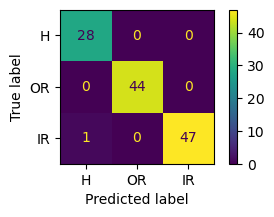

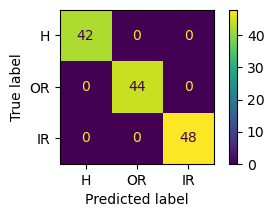

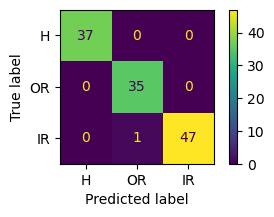

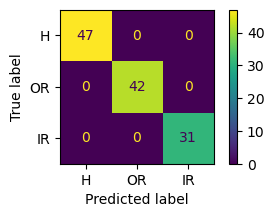

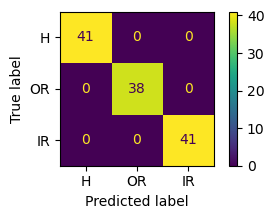

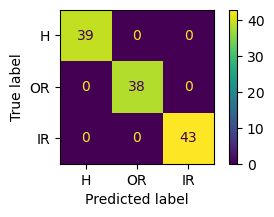

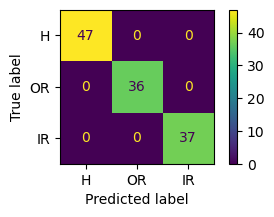

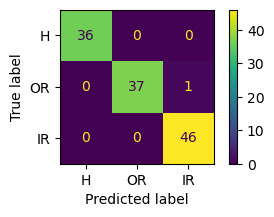

In [10]:
# Validate and Visualize
perfvit = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vit = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        Model = torch.load('./saved_models/ViT_'+ fcase+ '_' + tarData[tar]+'.pth', map_location=device)
        _, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate_pr(Model, TestLoader, numClass)
        print('Validation Accuracy = ', 100*val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_vit[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_vit[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels

        perfvit = pd.concat((perfvit, pd.DataFrame({fcase+ '_' + str(tar) : [100*val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/logits_vit.mat', logits_vit)

# Train benchmark models for comparisions
## Models: EfficientNet, ResNeXt, DenseNet, VGGNet, GoogleNet, SqeezeNet

Validation Accuracy =  95.83333333333334
__________________________________________________
Pricision Score = 0.9648148148148148
__________________________________________________
F_1 Score =  0.9615254933628005
__________________________________________________
Recall Score =  0.9603174603174603
__________________________________________________
Response time per batch
 0.2848470211029053
Validation Accuracy =  97.76119402985076
__________________________________________________
Pricision Score = 0.9777553083923154
__________________________________________________
F_1 Score =  0.9779183357930986
__________________________________________________
Recall Score =  0.9791666666666666
__________________________________________________
Response time per batch
 0.2241053581237793
Validation Accuracy =  97.5
__________________________________________________
Pricision Score = 0.9746120620700688
__________________________________________________
F_1 Score =  0.9755054302422722
_______________

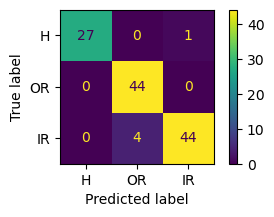

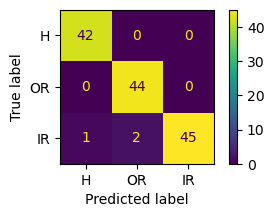

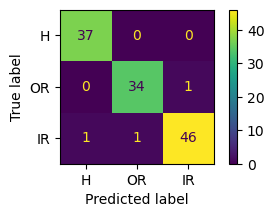

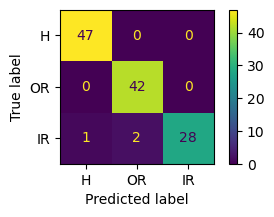

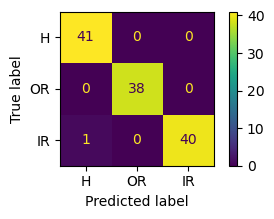

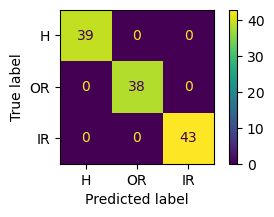

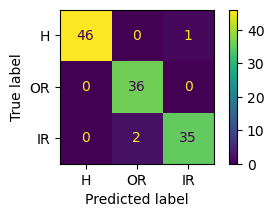

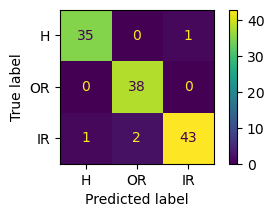

In [11]:
# Validate and Visualize
perfvit_pre = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vit_pre = {} 
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        Model = torch.load('./saved_models/ViT_pre_'+ fcase+ '_' + tarData[tar]+'.pth', map_location=device)
        _, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch\n', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_vit_pre[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_vit_pre[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels

        perfvit_pre = pd.concat((perfvit_pre, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
        
sio.savemat('./results/logits/logits_vit_pre.mat', logits_vit_pre)

### EfficientNet

Validation Accuracy =  94.16666666666667
__________________________________________________
Pricision Score = 0.9447054250652451
__________________________________________________
F_1 Score =  0.9468402188266364
__________________________________________________
Recall Score =  0.9501262626262627
__________________________________________________
Response time per batch
 0.14269328117370605
Validation Accuracy =  89.55223880597015
__________________________________________________
Pricision Score = 0.898328323577493
__________________________________________________
F_1 Score =  0.8960240270585099
__________________________________________________
Recall Score =  0.8998917748917749
__________________________________________________
Response time per batch
 0.11055111885070801
Validation Accuracy =  85.83333333333333
__________________________________________________
Pricision Score = 0.8890472796388691
__________________________________________________
F_1 Score =  0.8514919993817344
_

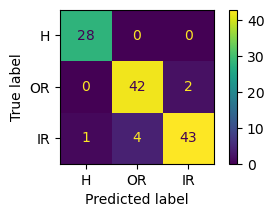

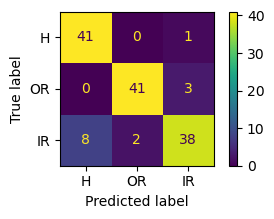

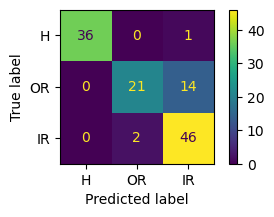

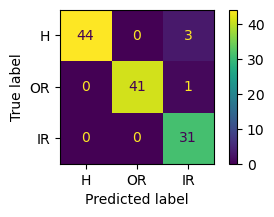

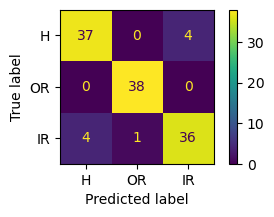

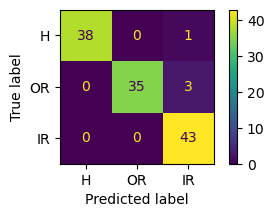

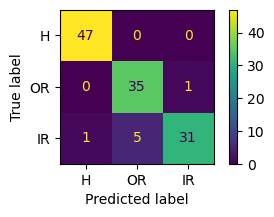

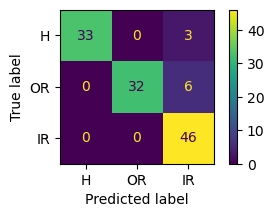

In [12]:
# Validate and Visualize
perfEffNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_effNet = {} 
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        Model = torch.load('./saved_models/efficient_'+ fcase+ '_' + tarData[tar]+'.pth', map_location=device)
        _, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch\n', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_effNet[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_effNet[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels

        perfEffNet = pd.concat((perfEffNet, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
        
sio.savemat('./results/logits/logits_effNet.mat', logits_effNet)

### ResNeXt

Validation Accuracy =  98.33333333333333
__________________________________________________
Pricision Score = 0.985479797979798
__________________________________________________
F_1 Score =  0.985479797979798
__________________________________________________
Recall Score =  0.985479797979798
__________________________________________________
Response time per batch 0.16795110702514648
Validation Accuracy =  93.28358208955224
__________________________________________________
Pricision Score = 0.9370567375886525
__________________________________________________
F_1 Score =  0.9323060081680771
__________________________________________________
Recall Score =  0.9375
__________________________________________________
Response time per batch 0.16284894943237305
Validation Accuracy =  94.16666666666667
__________________________________________________
Pricision Score = 0.9433773509403761
__________________________________________________
F_1 Score =  0.9421285920613576
_________________

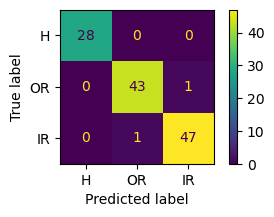

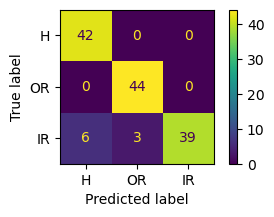

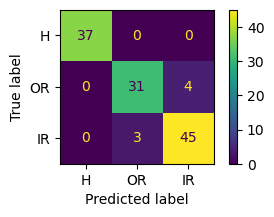

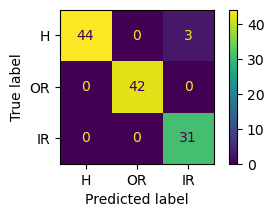

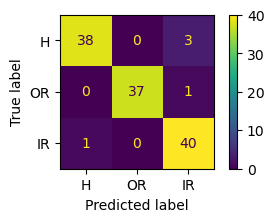

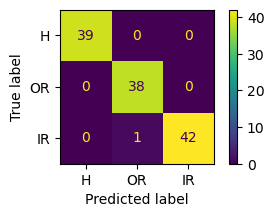

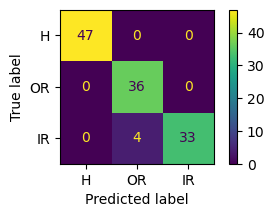

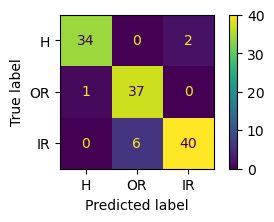

In [13]:
# Validate and Visualize
perfResNeXt = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_ResNeXt = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        Model = torch.load('./saved_models/ResNeXt_'+ fcase+ '_' +tarData[tar]+'.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_ResNeXt[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_ResNeXt[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels

        perfResNeXt = pd.concat((perfResNeXt, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/logits_ResNeXt.mat', logits_ResNeXt)

### DenseNet

Validation Accuracy =  87.5
__________________________________________________
Pricision Score = 0.8963133640552995
__________________________________________________
F_1 Score =  0.8813224523958988
__________________________________________________
Recall Score =  0.8958333333333334
__________________________________________________
Response time per batch 0.14318227767944336
Validation Accuracy =  85.82089552238806
__________________________________________________
Pricision Score = 0.8826676620629588
__________________________________________________
F_1 Score =  0.8548453808215739
__________________________________________________
Recall Score =  0.8674242424242425
__________________________________________________
Response time per batch 0.12520980834960938
Validation Accuracy =  76.66666666666667
__________________________________________________
Pricision Score = 0.8281335522714833
__________________________________________________
F_1 Score =  0.7592107756400505
_______________

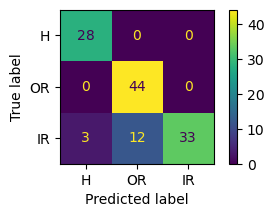

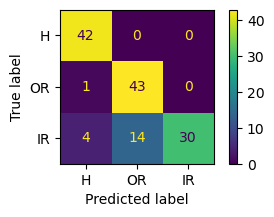

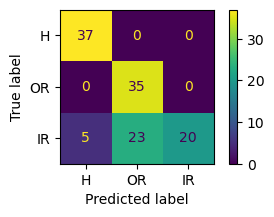

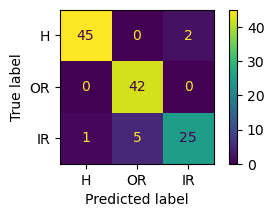

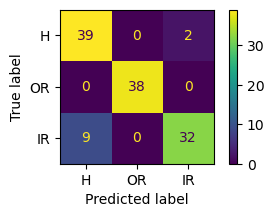

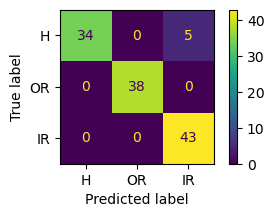

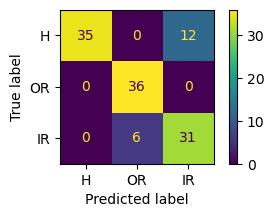

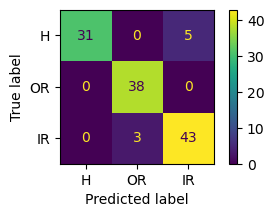

In [14]:
# Validate and Visualize
perfDenseNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_DenseNet = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        Model = torch.load('./saved_models/DenseNet_'+ fcase+ '_' +tarData[tar]+'.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_DenseNet[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_DenseNet[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfDenseNet = pd.concat((perfDenseNet, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/logits_DenseNet.mat', logits_DenseNet)

### vgg16Net

Validation Accuracy =  94.16666666666667
__________________________________________________
Pricision Score = 0.9460315869197183
__________________________________________________
F_1 Score =  0.9467718907078174
__________________________________________________
Recall Score =  0.9507575757575758
__________________________________________________
Response time per batch

 0.24524426460266113
Validation Accuracy =  93.28358208955224
__________________________________________________
Pricision Score = 0.9353884372177056
__________________________________________________
F_1 Score =  0.9328339575530586
__________________________________________________
Recall Score =  0.9368686868686869
__________________________________________________
Response time per batch

 0.1484816074371338
Validation Accuracy =  86.66666666666667
__________________________________________________
Pricision Score = 0.8814856289660321
__________________________________________________
F_1 Score =  0.8718146677590807

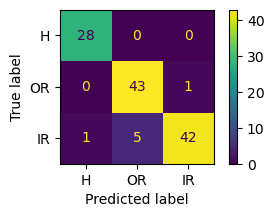

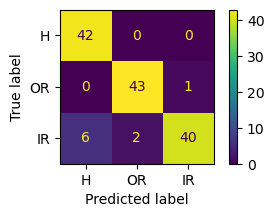

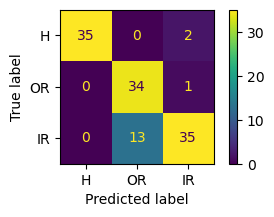

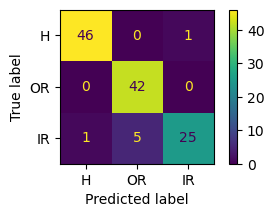

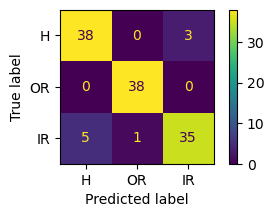

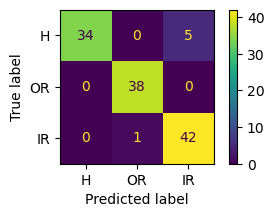

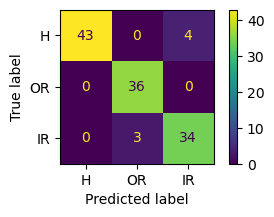

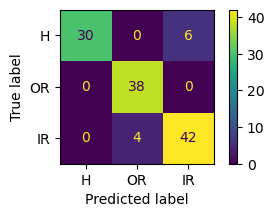

In [15]:
# Validate and Visualize
perfvgg16Net = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vgg16Net = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        Model = torch.load('./saved_models/vgg16Net_'+ fcase+ '_' +tarData[tar]+'.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch\n\n', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_vgg16Net[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_vgg16Net[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfvgg16Net = pd.concat((perfvgg16Net, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/logits_vgg16Net.mat', logits_vgg16Net)

### GoogleNet

Validation Accuracy =  80.0
__________________________________________________
Pricision Score = 0.8433622828784119
__________________________________________________
F_1 Score =  0.8067765879086634
__________________________________________________
Recall Score =  0.8327020202020202
__________________________________________________
Response time per batch 0.07972407341003418
Validation Accuracy =  89.55223880597015
__________________________________________________
Pricision Score = 0.9023053665910808
__________________________________________________
F_1 Score =  0.8937138130686518
__________________________________________________
Recall Score =  0.9021464646464646
__________________________________________________
Response time per batch 0.07374167442321777
Validation Accuracy =  80.83333333333333
__________________________________________________
Pricision Score = 0.8255650647355717
__________________________________________________
F_1 Score =  0.8098799934242972
_______________

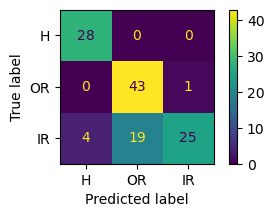

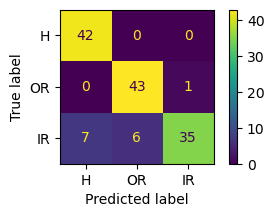

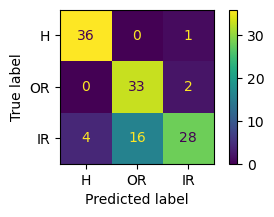

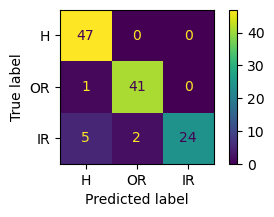

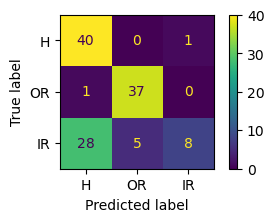

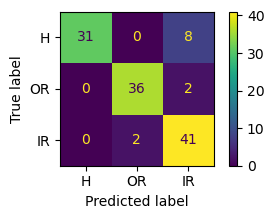

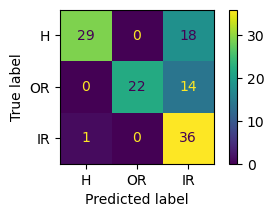

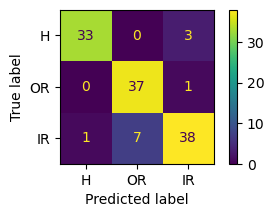

In [16]:
# Validate and Visualize
perfgoogleNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vgoogleNet = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        Model = torch.load('./saved_models/GoogleNet_'+ fcase+ '_' +tarData[tar]+'.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_vgoogleNet[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_vgoogleNet[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfgoogleNet = pd.concat((perfgoogleNet, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)

sio.savemat('./results/logits/logits_vgoogleNet.mat', logits_vgoogleNet)

### SqeezeNet

Validation Accuracy =  87.5
__________________________________________________
Pricision Score = 0.8782705389848248
__________________________________________________
F_1 Score =  0.8808799901124705
__________________________________________________
Recall Score =  0.8939393939393939
__________________________________________________
Response time per batch 0.04764962196350098
Validation Accuracy =  91.7910447761194
__________________________________________________
Pricision Score = 0.9234108527131782
__________________________________________________
F_1 Score =  0.91895674657823
__________________________________________________
Recall Score =  0.9217171717171717
__________________________________________________
Response time per batch 0.03872489929199219
Validation Accuracy =  89.16666666666667
__________________________________________________
Pricision Score = 0.8946923383962521
__________________________________________________
F_1 Score =  0.8948226731211592
__________________

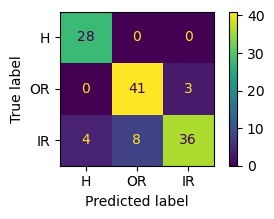

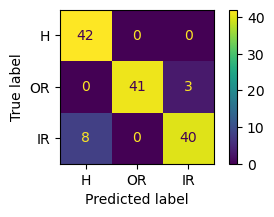

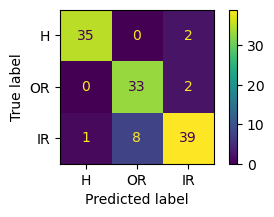

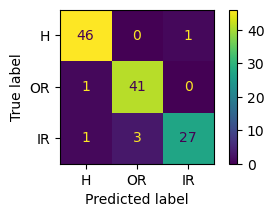

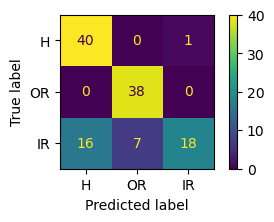

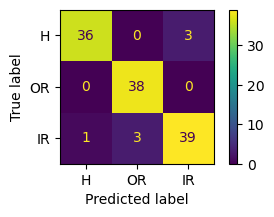

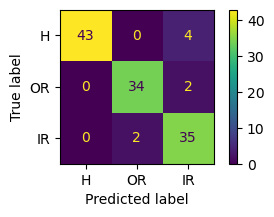

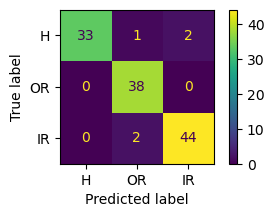

In [17]:
# Validate and Visualize

# Validate and Visualize
perfSqeezeNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_SqueezeNet = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        _, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        Model = torch.load('./saved_models/SqeezeNet_'+ fcase+ '_' +tarData[tar]+'.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_SqueezeNet[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_SqueezeNet[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfSqeezeNet = pd.concat((perfSqeezeNet, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/logits_SqueezeNet.mat', logits_SqueezeNet)

Validation Accuracy =  0.8333333333333334
__________________________________________________
Pricision Score = 0.8352116624614522
__________________________________________________
F_1 Score =  0.8340526189966909
__________________________________________________
Recall Score =  0.8387445887445887
__________________________________________________
Response time per batch 2.750129222869873
Validation Accuracy =  0.8880597014925373
__________________________________________________
Pricision Score = 0.8991181657848325
__________________________________________________
F_1 Score =  0.8886777757807619
__________________________________________________
Recall Score =  0.8885281385281384
__________________________________________________
Response time per batch 2.9868760108947754
Validation Accuracy =  0.75
__________________________________________________
Pricision Score = 0.7508294772351499
__________________________________________________
F_1 Score =  0.7488215488215487
________________

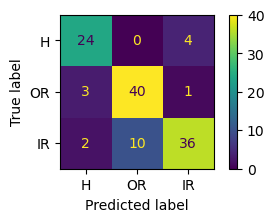

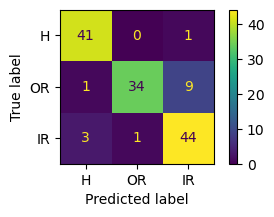

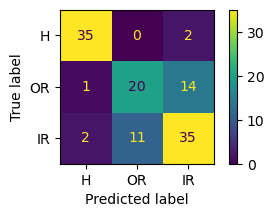

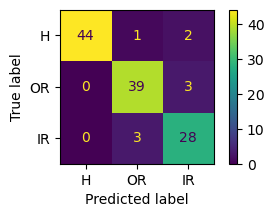

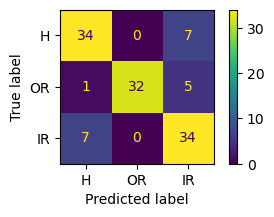

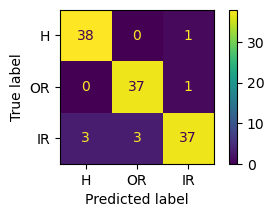

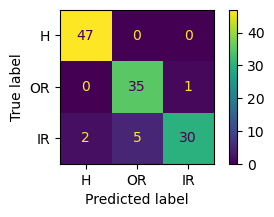

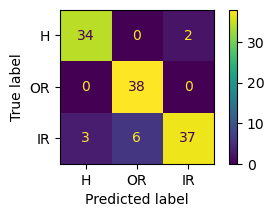

In [4]:
# Train and validate SVM
perfSVM = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_SVM = {}
for fcase in ['tar3', 'tar4']:
    for tar in range(len(tarData)):
        root_path = root + fcase + '/'
        TrainLoader, TestLoader, _, numClass = loaddata(root_path, tarData[tar])
        x_train, y_train = getFeatures(TrainLoader)
        model = SVC()
        model.fit(x_train, y_train)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate_svm(model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_SVM[f'pred_labels_{fcase}_{tarData[tar]}'] = tr_labels
        logits_SVM[f'tr_labels_{fcase}_{tarData[tar]}'] = pred_labels
        perfSVM = pd.concat((perfSVM, pd.DataFrame({fcase+ '_' + str(tar) : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/logits_SVM.mat', logits_SVM)

In [11]:
# df = pd.read_csv('./results/all_pbu.csv')
# df.drop('Unnamed: 0', axis = 1, inplace=True)
# df.columns = pd.RangeIndex(start=0, stop=9, step=1)
# df

In [9]:
combPerf = pd.concat((perfSVM, perfSqeezeNet, perfgoogleNet, perfvgg16Net, perfDenseNet, perfResNeXt, perfEffNet, perfvit_pre, perfvit), ignore_index=True, axis=0)
combPerf

,0,1,2,3,4,5,6,7,8
0,Val Acc.,0.833333,0.888060,0.750000,0.925000,0.833333,0.933333,0.933333,0.908333
1,Precision,0.835212,0.899118,0.750829,0.918487,0.849551,0.933516,0.933975,0.910424
2,F1_score,0.834053,0.888678,0.748822,0.919893,0.838391,0.933719,0.927524,0.909641
3,Recall,0.838745,0.888528,0.748847,0.922656,0.833547,0.936169,0.927678,0.916264
4,Val Acc.,87.500000,91.791045,89.166667,95.000000,80.000000,94.166667,93.333333,95.833333
5,Precision,0.878271,0.923411,0.894692,0.951479,0.835366,0.942791,0.932701,0.961117
6,F1_score,0.880880,0.918957,0.894823,0.945721,0.780135,0.942347,0.932479,0.958356
7,Recall,0.893939,0.921717,0.900434,0.941961,0.804878,0.943351,0.935095,0.957729
8,Val Acc.,80.000000,89.552239,80.833333,93.333333,70.833333,90.000000,72.500000,90.000000
9,Precision,0.843362,0.902305,0.825565,0.946760,0.783184,0.917097,0.832026,0.905420


In [10]:
combPerf.to_csv('./results/all_pbu.csv')